<a href="https://colab.research.google.com/github/Matheus-Pombeiro/mobile_device_usage/blob/main/mobile_device_usage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mobile Devices Usage**

## Initial settings

In [1]:
# Importing Pandas
import pandas as pd

In [2]:
# Getting the dataset url
url = 'https://raw.githubusercontent.com/Matheus-Pombeiro/mobile_device_usage/refs/heads/main/assets/datasets/user_behavior_dataset.csv'

In [3]:
# Reading the dataset
data = pd.read_csv(url)
data

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
...,...,...,...,...,...,...,...,...,...,...,...
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1


## Preferred device model and operating system

In [4]:
# Finding the preferred device model using the mode()
data['Device Model'].mode()

,Device Model
0,Xiaomi Mi 11
1,iPhone 12


In [9]:
# Finding the total of each device
total_of_devices = data['Device Model'].value_counts()
total_of_devices

,count
Device Model,
Xiaomi Mi 11,146
iPhone 12,146
Google Pixel 5,142
OnePlus 9,133
Samsung Galaxy S21,133


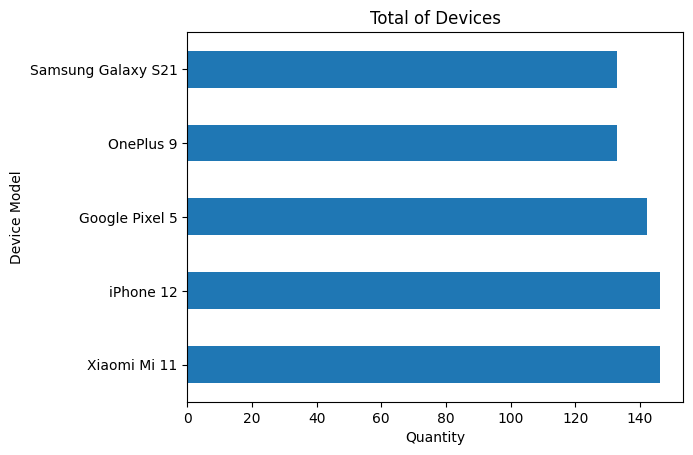

In [24]:
# Plotting the total of devices
total_of_devices.plot(kind='barh', title='Total of Devices', xlabel='Quantity', ylabel='Device Model');